# Outils informatiques/méthodes numériques avancées  pour la mécanique
# cours MGC2367M
# Dpt de mécanique UCB Lyon 1

## [Documents sur le cours](/cours_html/MGC2367M)

## [Aide à la programmation avec Ollama](/cours_html/MGC2367M/#ia-generative)

## [Consignes à lire attentivement](/cours_html/MGC2367M/consignes.html)

A la fin de votre session, pensez bien à vous déconnecter (bouton en haut à gauche **se déconnecter**)

**Ecrire votre nom , prénom et numéro d'étudiant (nombre entier) ci-dessous**

In [1]:
NOM = "Mouhalhal"
PRENOM="Moussaab"
NUMERO_ETUDIANT = 12408113

# Traitement de données en Python

**Marc BUFFAT**, dpt mécanique, UDCB Lyon 1


In [2]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib.pyplot as plt
from validation.validation import check_function,liste_functions,info_etudiant
from validation.valide_markdown import test_markdown
from validation import lissajous
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
try: NUMERO_ETUDIANT
except NameError: NUMERO_ETUDIANT = None     
# test si numero étudiant spécifier
if type(NUMERO_ETUDIANT) is not int :
    printmd("**ERREUR:**numéro d'étudiant non spécifié!!!")
    NOM,PRENOM,NUMERO_ETUDIANT = info_etudiant()
# parametres spécifiques
_uid_    = NUMERO_ETUDIANT 
_precis_ = 1.0e-5
printmd("**Login étudiant {} {} uid={}**".format(NOM,PRENOM,_uid_))
# generation des données
T0,X0,Y0,_p_,_q_=lissajous.create_Lissajous(_uid_)
fichier= "mon_fichier.dat"
entete = " donnees t,x,y pour uid={}".format(_uid_)
np.savetxt(fichier,np.transpose([T0,X0,Y0]),header=entete)
printmd("**Mise sur fichier des données dans : {}**".format(fichier))

**Login étudiant Mouhalhal Moussaab uid=12408113**

**Mise sur fichier des données dans : mon_fichier.dat**

## Objectif
On veut traiter des données stockées dans un fichier **mon_fichier.dat** contenant la valeur de 2 quantités X et Y  périodiques en fonction du temps t, qui sont 2 courbes de Lissajous enregistrées avec un pas en temps $\Delta t$ sur la période T commune à X et Y. Attention on enregistre le premier point à t=0 et le dernier à t=T.

Ces valeurs sont stockées par colonne suivant la structure ci dessous:

        # titre
        t0 x0 y0
        t1 x1 y1
        .......
        
La valeur de t dans ce fichier n'est pas forcément triée et les données X,Y sont bruitées.

L'objectif de cette étude est d'analyser ces données $X_i,Y_i$  en fonction du temps t et d'en déduire leurs pulsations, puis les paramètres de Lissajous p et q.


## Création d'une bibliotheque pour traiter les données

En utilisant le canevas python fourni, créer une bibliothèque de fonctions python dans le fichier bibliothèque **mabib.py**  pour traiter les informations stockées dans un fichier de données.

On écrira les fonctions suivantes

1. **lecture(fichier)**: 

écrire une fonction lecture(fichier) qui lit les données dans fichier et renvoie les tableaux T,X,Y

**Verification:** la taille des tableaux doit correspondre au nombre de lignes du fichier - 1. On appelle donc la fonction et on peut afficher la taille des tableaux renvoyés

2. **tri_bulles(T,X,Y)**:

Pour trier les données suivant T, écrire une fonction tri_bulle(T,X,Y) qui trie sur place les 3 tableaux T,X,Y passées en argument, le trie s'éffectuant par rapport au premier tableau T.

Les valeurs des tableaux passés en argument sont donc modifiées et la fonction ne renvoie rien.

Vous devez implémenter un algorithme de trie bulle dans cette fonction et ne pas utiliser la fonction sort de numpy. 

3. **spectre(T,U)**:

Pour un signal discret 𝑈 échantillonné à des temps 𝑇, écrire une fonction spectre(T,U) qui calcule le spectre d'un signal et renvoie la fréquence et le spectre. On utilisera la fonction fft de la bibliothéque numpy.


4. **analyse_spectral(T,U)**:

Pour un signal discret 𝑈 échantillonné à des temps 𝑇, écrire une fonction  analyse_spectrale(T,U) qui retourne l'amplitude, la phase et la frequence fondamentale du signal. On utilisera la fonction fft de la bibliothéque numpy

pour le signal $u=2 \cos{t}$ sur $[0,2\pi]$ , l'amplitude est égale à 2, la phase à 0., et la fréquence $f=\frac{1}{2\pi}\approx 0.159155 $

5. **ecriture(fichier,T,X,Y)**:

Ecrire une fonction ecriture qui ecrit dans un fichier la courbe de lissajous filtrée avec le format suivant:

     # courbe lissajous N=zz
     t0 x0 y0
     t1 x1 y1
     ....





### Travail demandé :

3. Ecrire les fonctions dans le fichier **mabib.py**
4. pour chaque fonction:
   - on écrira le code python de la fonction
   - un exemple de vérification de la fonction (a la fin du fichier)
   - Exécuter le code python dans une fenêtre

5. pour lister les tests des fonctions de la bibliothèque
  
          test_exo -l S220
       
  - pour valider une fonction func par rapport à un exo
         
          test_exo mabib.py exo func 

### Méthodes de programmation

Après avoir défini l'algorithme: i.e. la méthode à mettre en oeuvre

1. utilisation de l'éditeur python de Jupyterlab pour éditer mabib.py et utiliser le terminal pour vérifier et valider les fonctions
2. utilisation du notebook: écriture de la fonction dans le notebook pour tester, puis la copier une fois validée dans le fichier mabib.py
3. utilisation d'un IDE python, p.e. spyder (accessible sous Xpra avec Jupyterlab)

## Validation bibliothéque
Enfin, une fois les vérifications faites on passera les tests de validation suivants

- valider les fonctions dans le terminal à l'aide de **test_exo**

      test_exo mabib.py exo220 lecture
      
      test_exo mabib.py exo221 tri_bulles
      
      test_exo mabib.py exo222 analyse_spectral
      
      test_exo mabib.py exo223 ecriture
      

## Analyse des données

en utilisant la bibliothéque précédente:

 - lire les données T,X,Y
 - trier des donnees suivant T
 - calcul des modes principaux (valeurs X1,Y1 en T)
 - détermination des coefficients entiers p et q 
 - tracée de la courbe de lissajous
 - sauvegarder le résultat dans un fichier lissajous.dat

### Comparer le signal et son mode principal 
calculer les valeurs X1 et Y1 des modes principaux de X et Y
- tracer le spectre de T,X et T,Y
- déterminer les modes principaux et les valeurs de p,q de X,Y
- calculer le signal X1,Y1 non bruité
- tracer T,X  et T,X1 sur un meme graphe

fréquence fondamentale de X =0.125 Hz
fréquence fondamentale de Y =0.14285714285714285 Hz


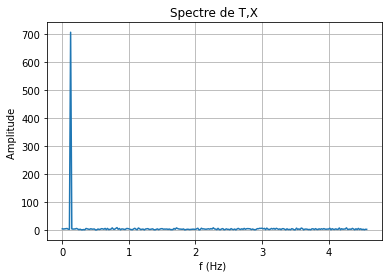

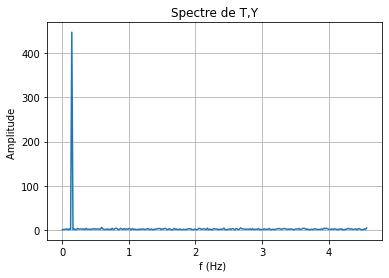

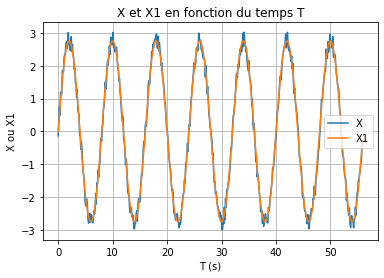

In [3]:
import matplotlib.pyplot as plt
from mabib import *
#spectre de T,X et T,Y
T,X,Y=lecture("mon_fichier.dat")
tri_bulles(T,X,Y)
f_x,s_x=spectre(T,X)
f_y,s_y=spectre(T,Y)
plt.figure()
plt.plot(f_x,np.abs(s_x))
plt.title('Spectre de T,X')
plt.xlabel('f (Hz) ')
plt.ylabel('Amplitude ')
plt.grid(True)
plt.savefig('SpectreX.png')
plt.figure()
plt.plot(f_y,np.abs(s_y))
plt.title('Spectre de T,Y')
plt.xlabel('f (Hz) ')
plt.ylabel('Amplitude ')
plt.grid(True)
plt.print=False
plt.savefig('SpectreY.png')
#modes principaux (valeurs X1,Y1 en T)
amplitude_x,phase_x,fx=analyse_spectral(T,X)
amplitude_y,phase_y,fy=analyse_spectral(T,Y)
print(f"fréquence fondamentale de X ={fx} Hz")
print(f"fréquence fondamentale de Y ={fy} Hz")
#signal X1,Y1 non bruité
i=np.argmax(np.abs(s_x))
S = np.zeros(len(s_x), dtype=complex)
S[i] = s_x[i]
X1 = np.fft.irfft(S,n=len(X)) #c'est exactement ça X1=amplitude_x*np.cos(2*np.pi*fx*T + phase_x) 
Y1=amplitude_y*np.cos(2*np.pi*fy*T + phase_y)
#T,X et T,X1 sur un meme graphe
plt.figure()
plt.plot(T,X,label='X')
plt.plot(T,X1,label='X1')
plt.title('X et X1 en fonction du temps T')
plt.legend()
plt.xlabel('T (s)')
plt.ylabel('X ou X1')
plt.grid(True)
plt.savefig('X_X1_T.png')

### calculer les 2 coefficients de Lissajous

calculer les 2 valeurs entières p et q

In [4]:
p=2*np.pi*fx
q=2*np.pi*fy
print("coefficients de Lissajous p={} q={}".format(p,q))
print(f"rapport p/q={p/q}")

coefficients de Lissajous p=0.7853981633974483 q=0.8975979010256552
rapport p/q=0.875


### Tracer de la courbe de lissajous Y fonction de X

tracer sur un meme figure Y fonction de X et Y1 fonction de X1 

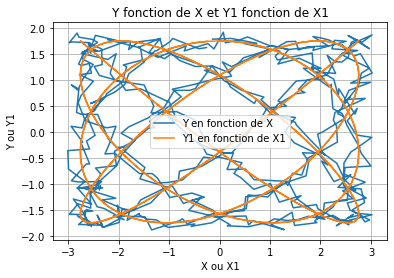

In [5]:
plt.figure()
plt.plot(X,Y,label='Y en fonction de X')
plt.plot(X1,Y1,label='Y1 en fonction de X1')
plt.legend()
plt.title('Y fonction de X et Y1 fonction de X1')
plt.xlabel('X ou X1')
plt.ylabel('Y ou Y1')
plt.grid(True)
plt.print=False
plt.savefig('Y_Y1_X_X1.png')

## Compte rendu

Ecrire votre analyse et votre conclusion dans le compte rendu en insistant sur 

  1. Description succincte de la méthode d'analyse
           
  2. Commentaire sur les résultats (courbes) et analyse
           
  3. Conclusion
  
Le compte rendu est à écrire dans le fichier **CompteRendu.md**

  1. Génération de la version HTML du Compte Rendu (avec mise en page)

   - Exécution de la commande ci-dessous pour générer le fichier html
         
  
  2. Visualisation du Compte Rendu (version html) 

   - Cliquez sur le lien suivant après exécution de la commande
   
       [CompteRendu.html](CompteRendu.html)



In [6]:
# génération de la version html du CR
!genereTPhtml CompteRendu

In [7]:
# test sur les commentaires (a executer)
assert(test_markdown('CompteRendu.md',None,minm=200,maxe=0.25))

## FIN